<center>
  <span style="font-size: 24px; font-weight: bold;">
NOTEBOOK ANALYSE DES MOTS   
  </span>
</center>



*** 
**Ia/ Chargement des librairies**
***

In [584]:
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
import spacy
from collections import Counter
from wordcloud import WordCloud
import polars as pl
from sklearn.feature_extraction.text import TfidfVectorizer
from matplotlib_venn import venn2

*** 
**Ib/ Chargement des chemins locaux**
***

In [466]:
df_recipe=pl.read_csv("~/Programmation/bigdata/bigdata_pjt/kit_big_data_mangetamain/data/RAW_recipes.csv")


df_interaction=pl.read_csv("~/Programmation/bigdata/bigdata_pjt/kit_big_data_mangetamain/data/RAW_interactions.csv")


*** 
**Ic/ Compréhension initiale des données**
***

In [467]:
df_interaction.head()

user_id,recipe_id,date,rating,review
i64,i64,str,i64,str
38094,40893,"""2003-02-17""",4,"""Great with a salad. Cooked on …"
1293707,40893,"""2011-12-21""",5,"""So simple, so delicious! Great…"
8937,44394,"""2002-12-01""",4,"""This worked very well and is E…"
126440,85009,"""2010-02-27""",5,"""I made the Mexican topping and…"
57222,85009,"""2011-10-01""",5,"""Made the cheddar bacon topping…"


In [468]:
df_recipe.head()

name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
str,i64,i64,i64,str,str,str,i64,str,str,str,i64
"""arriba baked winter squash m…",137739,55,47892,"""2005-09-16""","""['60-minutes-or-less', 'time-t…","""[51.5, 0.0, 13.0, 0.0, 2.0, 0.…",11,"""['make a choice and proceed wi…","""autumn is my favorite time of …","""['winter squash', 'mexican sea…",7
"""a bit different breakfast piz…",31490,30,26278,"""2002-06-17""","""['30-minutes-or-less', 'time-t…","""[173.4, 18.0, 0.0, 17.0, 22.0,…",9,"""['preheat oven to 425 degrees …","""this recipe calls for the crus…","""['prepared pizza crust', 'saus…",6
"""all in the kitchen chili""",112140,130,196586,"""2005-02-25""","""['time-to-make', 'course', 'pr…","""[269.8, 22.0, 32.0, 48.0, 39.0…",6,"""['brown ground beef in large p…","""this modified version of 'mom'…","""['ground beef', 'yellow onions…",13
"""alouette potatoes""",59389,45,68585,"""2003-04-14""","""['60-minutes-or-less', 'time-t…","""[368.1, 17.0, 10.0, 2.0, 14.0,…",11,"""['place potatoes in a large po…","""this is a super easy, great ta…","""['spreadable cheese with garli…",11
"""amish tomato ketchup for can…",44061,190,41706,"""2002-10-25""","""['weeknight', 'time-to-make', …","""[352.9, 1.0, 337.0, 23.0, 3.0,…",5,"""['mix all ingredients& boil fo…","""my dh's amish mother raised hi…","""['tomato juice', 'apple cider …",8



*** 
**II/ Analyse étude comparée**
***

/tmp/ipykernel_172925/398781253.py:17: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
(Deprecated in version 0.20.5)
  .agg(pl.count().alias("contributions"))


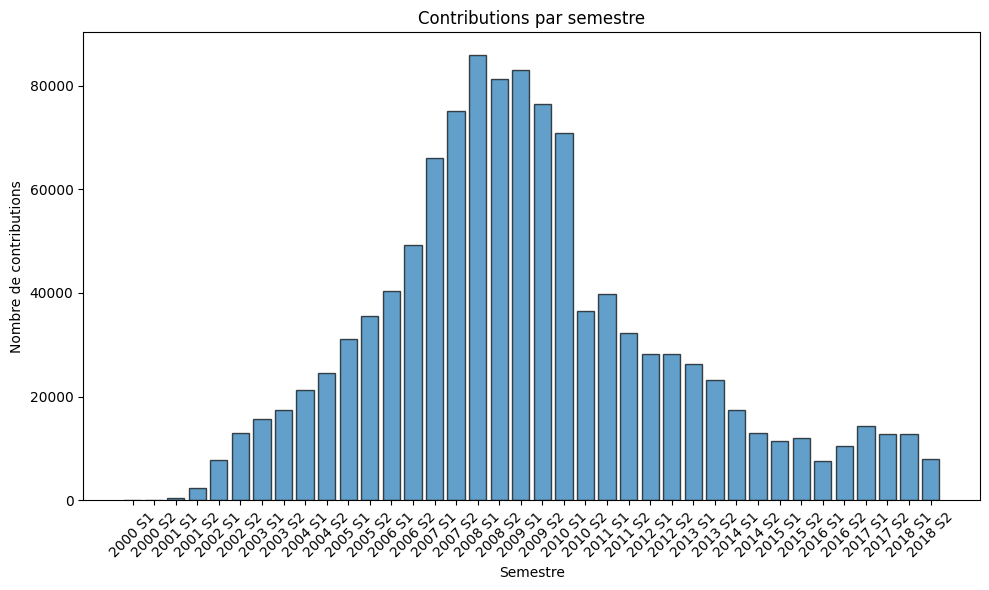

In [469]:
df_interaction = df_interaction.with_columns(
    pl.col("date").str.strptime(pl.Date, "%Y-%m-%d", strict=False)  # Conversion en date
)

df_interaction = df_interaction.with_columns([
    pl.col("date").dt.year().alias("year"),
    ((pl.col("date").dt.month() - 1) // 6 + 1).alias("semester")
])

df_interaction = df_interaction.with_columns(
    (pl.col("year").cast(pl.Utf8) + " S" + pl.col("semester").cast(pl.Utf8)).alias("year_semester")
)

semester_counts = (
    df_interaction
    .group_by("year_semester")
    .agg(pl.count().alias("contributions"))
    .sort("year_semester")
)

labels = semester_counts["year_semester"].to_list()
counts = semester_counts["contributions"].to_list()

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(labels, counts, edgecolor='black', alpha=0.7)
plt.title("Contributions par semestre")
plt.xlabel("Semestre")
plt.ylabel("Nombre de contributions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


*** 
**III/ Analyse de mots par la frequence brute et du TF-IDF**
***


**1.a/ Analyse de mot dans les recettes les plus commentées -- fréquence brute**


In [508]:
# 1. Compter le nombre de reviews par recette
reviews_count = (
    df_interaction
    .group_by("recipe_id")
    .agg(pl.count().alias("review_count"))
    .sort("review_count", descending=True)
)

# 2. Afficher les 10 recettes avec le plus de reviews
print(reviews_count.head(10))

# 3. Sélectionner les 10 recettes les plus commentées
top_recipes = reviews_count.head(20)

# 4. Extraire les IDs des recettes
top_recipe_ids = top_recipes["recipe_id"].to_list()

# 5. Filtrer les reviews des 10 recettes les plus commentées
reviews_top = df_interaction.filter(
    pl.col("recipe_id").is_in(top_recipe_ids)
)

# 6. Extraire les textes des reviews sous forme de liste
texts_top = reviews_top["review"].to_list()




shape: (10, 2)
┌───────────┬──────────────┐
│ recipe_id ┆ review_count │
│ ---       ┆ ---          │
│ i64       ┆ u32          │
╞═══════════╪══════════════╡
│ 2886      ┆ 1613         │
│ 27208     ┆ 1601         │
│ 89204     ┆ 1579         │
│ 39087     ┆ 1448         │
│ 67256     ┆ 1322         │
│ 54257     ┆ 1305         │
│ 22782     ┆ 1234         │
│ 32204     ┆ 1220         │
│ 69173     ┆ 997          │
│ 68955     ┆ 904          │
└───────────┴──────────────┘


/tmp/ipykernel_172925/2331159800.py:5: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
(Deprecated in version 0.20.5)
  .agg(pl.count().alias("review_count"))


In [509]:
#prétraitement à sauver avant
# Charger le modèle spaCy
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])

# Définir les stop words
stop_words = set(spacy.lang.en.stop_words.STOP_WORDS)
stop_words.update(['recipe','thank','instead','minute','hour','I','water','bit','definitely','thing','half','way','like'])

def clean_text(text):
    if isinstance(text, str) and pd.notna(text):
        doc = nlp(text.lower())
        words = [token.lemma_ for token in doc if token.is_alpha and token.lemma_ not in stop_words and token.pos_ !="VERB"]
        return words
    return []

# Appliquer le nettoyage à tous les textes des reviews
cleaned_texts_top = []
for text in texts_top:
    cleaned_texts_top.extend(clean_text(text))


In [510]:
# Compter les occurrences des mots nettoyés
word_counts_top = Counter(cleaned_texts_top)

# Afficher les 50 mots les plus fréquents
most_common_words_top = word_counts_top.most_common(100)

print("Mots les plus fréquents dans les reviews des 50 recettes les plus commentées :")
print(most_common_words_top)


Mots les plus fréquents dans les reviews des 50 recettes les plus commentées :
[('good', 8204), ('time', 6096), ('great', 5582), ('sauce', 5205), ('chicken', 5136), ('easy', 4399), ('delicious', 3616), ('banana', 2974), ('little', 2683), ('cheese', 2611), ('cup', 2553), ('cream', 2461), ('family', 2347), ('bread', 2345), ('flavor', 2312), ('cake', 2258), ('moist', 1924), ('garlic', 1796), ('husband', 1784), ('onion', 1746), ('wonderful', 1697), ('perfect', 1675), ('roast', 1527), ('review', 1502), ('dish', 1467), ('pepper', 1423), ('sugar', 1419), ('meat', 1375), ('pot', 1363), ('pan', 1315), ('meatloaf', 1315), ('yummy', 1248), ('butter', 1244), ('beef', 1235), ('taste', 1225), ('amazing', 1130), ('oven', 1109), ('tasty', 1106), ('sure', 1100), ('excellent', 1098), ('dinner', 1091), ('day', 1085), ('meatball', 1083), ('mix', 1081), ('seasoning', 1078), ('extra', 1072), ('exactly', 1062), ('keeper', 1057), ('awesome', 1054), ('leftover', 1041), ('star', 1013), ('brownie', 1011), ('toma

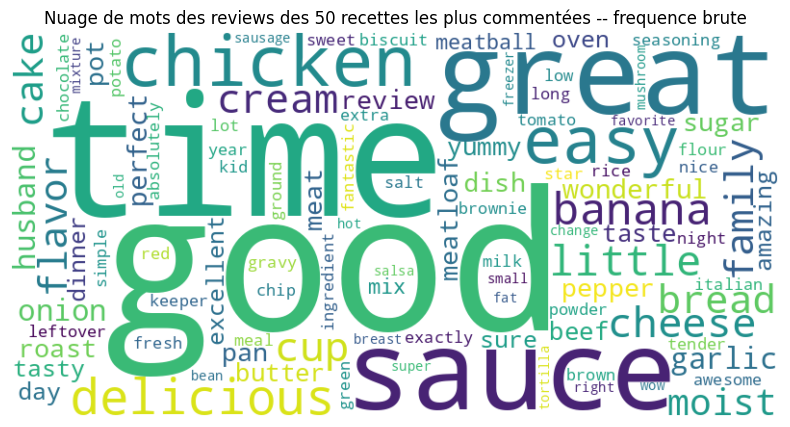

In [511]:
# Générer le nuage de mots
word_freq_top = dict(most_common_words_top)
wordcloud_top = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_top)

# Afficher le nuage de mots
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_top, interpolation='bilinear')
plt.axis('off')
plt.title("Nuage de mots des reviews des 50 recettes les plus commentées -- frequence brute")
plt.show()


**1.b/ Analyse de mot dans les recettes les plus commentées -- TF-IDF**

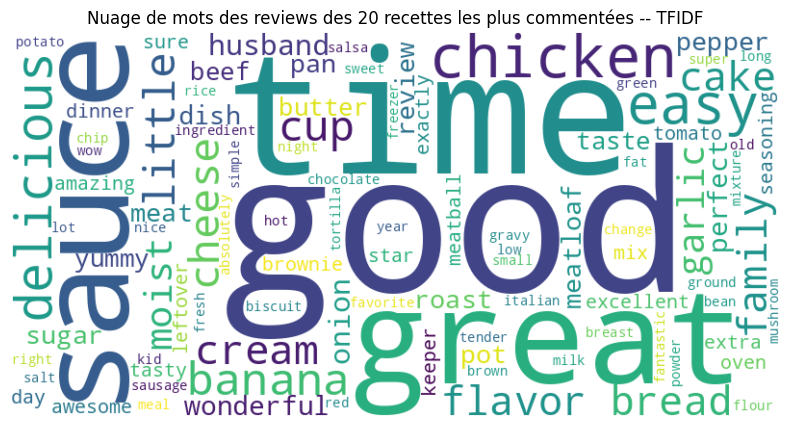

In [512]:
# Nettoyer chaque review et la reconstituer en chaîne de caractères
cleaned_reviews_top = [" ".join(clean_text(text)) for text in texts_top]

# Initialiser le vectoriseur TF-IDF
vectorizer = TfidfVectorizer(
    max_features=100,  # Limiter au top 1000 mots
    stop_words='english',  # Optionnel : filtrer les stop words anglais
    ngram_range=(1, 2)  # Optionnel : inclure les bigrams (ex: "very good")
)

# Appliquer TF-IDF aux reviews nettoyées
tfidf_matrix_top = vectorizer.fit_transform(cleaned_reviews_top)

# Récupérer les noms des features (mots)
feature_names = vectorizer.get_feature_names_out()
# Calculer la somme des scores TF-IDF pour chaque mot
tfidf_scores_top = tfidf_matrix_top.sum(axis=0).A1

# Créer un DataFrame pour visualiser les résultats
tfidf_df_top = pd.DataFrame({
    "word": feature_names,
    "tfidf_score": tfidf_scores_top
}).sort_values("tfidf_score", ascending=False)

# Générer le nuage de mots
word_freq_idftop = dict(zip(tfidf_df_top["word"], tfidf_df_top["tfidf_score"]))

wordcloud_idftop = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_top)

# Afficher le nuage de mots
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_idftop, interpolation='bilinear')
plt.axis('off')
plt.title("Nuage de mots des reviews des 20 recettes les plus commentées -- TFIDF")
plt.show()

**1.c/ Comparatif des deux méthodes**

In [515]:
# Mots les plus fréquents par fréquence brute
word_counts_top = Counter([word for text in cleaned_reviews_top for word in text.split()])
most_common_words_top = word_counts_top.most_common(50)
freq_words_top = [word for word, _ in most_common_words_top[:20]]

# Top mots TF-IDF
tfidf_words_top = tfidf_df_top["word"].head(50).tolist()

print("\nComparaison :")
print("Top 20 mots fréquents :", [word for word, count in most_common_words_top[:20]])
print("Top 20 mots TF-IDF :", tfidf_df_top["word"].head(20).tolist())



Comparaison :
Top 20 mots fréquents : ['good', 'time', 'great', 'sauce', 'chicken', 'easy', 'delicious', 'banana', 'little', 'cheese', 'cup', 'cream', 'family', 'bread', 'flavor', 'cake', 'moist', 'garlic', 'husband', 'onion']
Top 20 mots TF-IDF : ['good', 'great', 'time', 'easy', 'chicken', 'sauce', 'delicious', 'banana', 'family', 'little', 'cheese', 'bread', 'flavor', 'cream', 'cake', 'cup', 'moist', 'husband', 'wonderful', 'perfect']


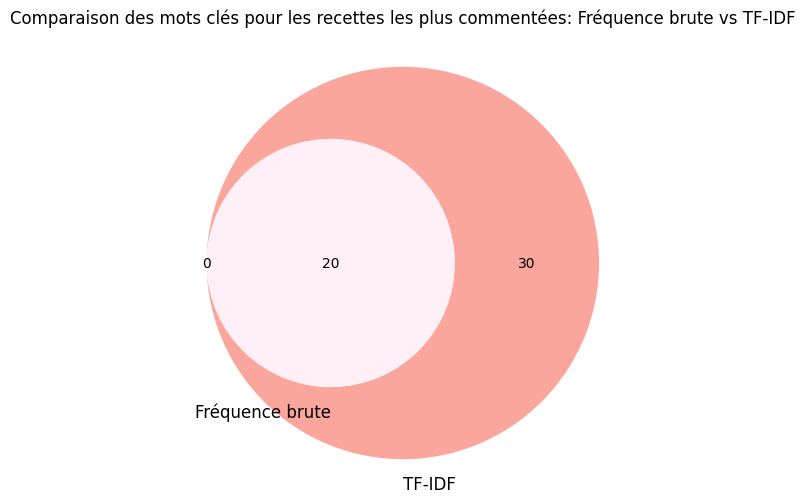

In [516]:

plt.figure(figsize=(8, 6))
venn2(
    [set(freq_words_top), set(tfidf_words_top)],
    ("Fréquence brute", "TF-IDF"),
    set_colors=("skyblue", "salmon"),
    alpha=0.7
)
plt.title("Comparaison des mots clés pour les recettes les plus commentées: Fréquence brute vs TF-IDF")
plt.show()

**2.a/ Analyse de mot dans les recettes les plus commentées et mieux notées -- frequence brute**

In [517]:
# 1. Compter le nombre total de reviews par recette
reviews_count_all = (
    df_interaction
    .group_by("recipe_id")
    .agg(pl.count().alias("total_review_count"))
)

# 2. Calculer la note moyenne par recette
avg_rating = (
    df_interaction
    .group_by("recipe_id")
    .agg(pl.col("rating").mean().alias("avg_rating"))
)

# 3. Fusionner les deux DataFrames (join en Polars)
recipe_stats = reviews_count_all.join(
    avg_rating,
    on="recipe_id",
    how="inner"
)

# 4. Filtrer les recettes avec une note moyenne de 5/5
top_rated_recipes = recipe_stats.filter(
    pl.col("avg_rating") == 5.0
)

# 5. Trier par nombre total de reviews (du plus grand au plus petit)
top_rated_and_reviewed = top_rated_recipes.sort(
    "total_review_count",
    descending=True
)

# 6. Afficher les 10 recettes les plus commentées ET notées 5/5
print(top_rated_and_reviewed.head(10))

# 7. Sélectionner les 10 recettes les plus commentées et notées 5/5
top_rated_and_reviewed_recipe_ids = (
    top_rated_and_reviewed
    .head(10)["recipe_id"]
    .to_list()
)

# 8. Filtrer le DataFrame original pour obtenir uniquement les reviews de ces recettes (note 5/5)
reviews_top_rated_and_reviewed = df_interaction.filter(
    (pl.col("recipe_id").is_in(top_rated_and_reviewed_recipe_ids)) &
    (pl.col("rating") == 5.0)
)

# 9. Extraire les textes des reviews
texts_top_rated_and_reviewed = reviews_top_rated_and_reviewed["review"].to_list()


shape: (10, 3)
┌───────────┬────────────────────┬────────────┐
│ recipe_id ┆ total_review_count ┆ avg_rating │
│ ---       ┆ ---                ┆ ---        │
│ i64       ┆ u32                ┆ f64        │
╞═══════════╪════════════════════╪════════════╡
│ 55309     ┆ 52                 ┆ 5.0        │
│ 24768     ┆ 37                 ┆ 5.0        │
│ 121941    ┆ 36                 ┆ 5.0        │
│ 166669    ┆ 36                 ┆ 5.0        │
│ 62754     ┆ 32                 ┆ 5.0        │
│ 269136    ┆ 31                 ┆ 5.0        │
│ 199171    ┆ 31                 ┆ 5.0        │
│ 45107     ┆ 28                 ┆ 5.0        │
│ 94087     ┆ 28                 ┆ 5.0        │
│ 495202    ┆ 28                 ┆ 5.0        │
└───────────┴────────────────────┴────────────┘


/tmp/ipykernel_172925/2740472800.py:5: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
(Deprecated in version 0.20.5)
  .agg(pl.count().alias("total_review_count"))


In [518]:
# Appliquer le nettoyage à tous les textes des reviews
cleaned_texts_top_reviews = []
for text in texts_top_rated_and_reviewed:
    cleaned_texts_top_reviews.extend(clean_text(text))

In [519]:
# Compter les occurrences des mots nettoyés
word_counts_top_review = Counter(cleaned_texts_top_review)

# Afficher les 50 mots les plus fréquents
most_common_words_top_review = word_counts_top_review.most_common(100)

print("Mots les plus fréquents dans les 50 recettes les mieux notés et plus commentées :")
print(most_common_words_top_review)

Mots les plus fréquents dans les 50 recettes les mieux notés et plus commentées :
[('bread', 119), ('great', 116), ('salad', 98), ('good', 96), ('delicious', 65), ('wonderful', 60), ('flavor', 54), ('easy', 53), ('time', 50), ('tomato', 47), ('cheese', 45), ('sugar', 43), ('potato', 40), ('perfect', 37), ('cake', 35), ('cookie', 34), ('family', 33), ('cinnamon', 31), ('cranberry', 29), ('nice', 28), ('loaf', 28), ('cup', 25), ('tasty', 24), ('little', 24), ('yummy', 23), ('taste', 23), ('fresh', 23), ('keeper', 22), ('kittencal', 22), ('sweet', 22), ('dish', 22), ('chicken', 22), ('star', 21), ('breakfast', 21), ('favorite', 21), ('toast', 21), ('dinner', 20), ('green', 20), ('caesar', 20), ('fantastic', 19), ('party', 19), ('day', 19), ('soft', 19), ('coffee', 17), ('almond', 17), ('combination', 17), ('beautiful', 17), ('awesome', 17), ('dough', 17), ('dressing', 17), ('strawberry', 16), ('cream', 16), ('year', 16), ('pretty', 16), ('addition', 16), ('garlic', 16), ('jam', 15), ('mor

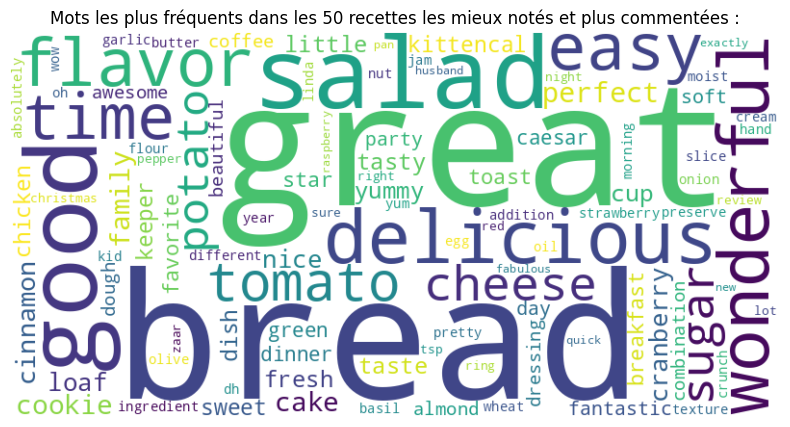

In [520]:
# Générer le nuage de mots
word_freqbrut_top_review = dict(most_common_words_top_review)
wordcloud_top_review = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freqbrut_top_review)

# Afficher le nuage de mots
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_top_review, interpolation='bilinear')
plt.axis('off')
plt.title("Mots les plus fréquents dans les 50 recettes les mieux notés et plus commentées :")
plt.show()

**2.b/ Analyse de mot dans les recettes les plus commentées et mieux notées -- TF-IDF**

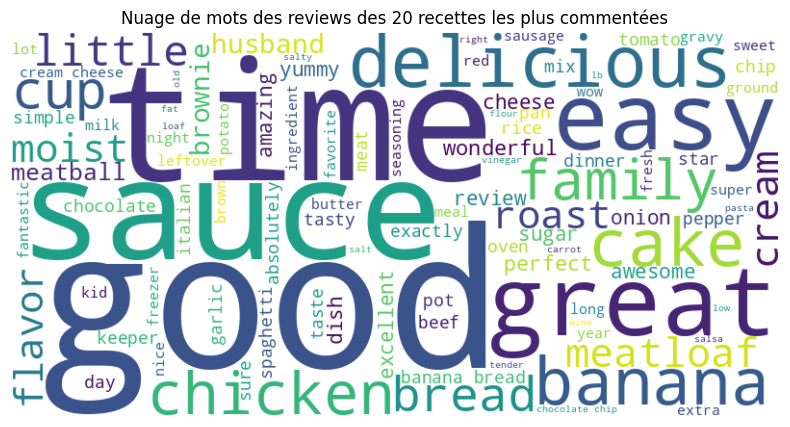

In [554]:
# Nettoyer chaque review et la reconstituer en chaîne de caractères
cleaned_top_reviews = [" ".join(clean_text(text)) for text in texts_top_rated_and_reviewed]

# Initialiser le vectoriseur TF-IDF
vectorizer = TfidfVectorizer(
    max_features=100,  # Limiter au top 1000 mots
    stop_words='english',  # Optionnel : filtrer les stop words anglais
    ngram_range=(1, 2)  # Optionnel : inclure les bigrams (ex: "very good")
)

# Appliquer TF-IDF aux reviews nettoyées
tfidf_matrix_top_review = vectorizer.fit_transform(cleaned_reviews)

# Récupérer les noms des features (mots)
feature_names = vectorizer.get_feature_names_out()
# Calculer la somme des scores TF-IDF pour chaque mot
tfidf_scores_top_review = tfidf_matrix_top_review.sum(axis=0).A1

# Créer un DataFrame pour visualiser les résultats
tfidf_df_top_review = pd.DataFrame({
    "word": feature_names,
    "tfidf_score": tfidf_scores_top_review
}).sort_values("tfidf_score", ascending=False)
# Générer le nuage de mots
word_freq_idf_top_review = dict(zip(tfidf_df_top_review["word"], tfidf_df_top_review["tfidf_score"]))

wordcloud_idf_top_review = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_idf_top_review)

# Afficher le nuage de mots
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_idf_top_review, interpolation='bilinear')
plt.axis('off')
plt.title("Nuage de mots des reviews des 20 recettes les plus commentées")
plt.show()

**2.c/ Comparatif des deux méthodes**

In [557]:
# Mots les plus fréquents par fréquence brute
word_counts_top_reviews = Counter([word for text in cleaned_top_reviews for word in text.split()])
most_common_words_top_review = word_counts_top_reviews.most_common(50)
freq_words_top_review = [word for word, _ in most_common_words_top_review[:50]]

# Top mots TF-IDF
tfidf_words_top_review = tfidf_df_top_review["word"].head(50).tolist()

print("\nComparaison :")
print("Top 20 mots fréquents :", [word for word, count in most_common_words_top_review[:50]])
print("Top 20 mots TF-IDF :", tfidf_words_top_review)



Comparaison :
Top 20 mots fréquents : ['bread', 'great', 'salad', 'good', 'delicious', 'wonderful', 'flavor', 'easy', 'time', 'tomato', 'cheese', 'sugar', 'potato', 'perfect', 'cake', 'like', 'cookie', 'family', 'cinnamon', 'cranberry', 'nice', 'loaf', 'cup', 'tasty', 'little', 'yummy', 'taste', 'fresh', 'keeper', 'kittencal', 'sweet', 'dish', 'chicken', 'star', 'breakfast', 'favorite', 'toast', 'dinner', 'green', 'caesar', 'fantastic', 'party', 'day', 'soft', 'coffee', 'almond', 'combination', 'beautiful', 'awesome', 'dough']
Top 20 mots TF-IDF : ['good', 'time', 'sauce', 'great', 'easy', 'delicious', 'cake', 'banana', 'chicken', 'family', 'cup', 'bread', 'little', 'meatloaf', 'roast', 'flavor', 'moist', 'cream', 'husband', 'brownie', 'meatball', 'wonderful', 'perfect', 'sugar', 'review', 'cheese', 'yummy', 'amazing', 'awesome', 'onion', 'dish', 'excellent', 'banana bread', 'chip', 'chocolate', 'tasty', 'taste', 'rice', 'garlic', 'meat', 'day', 'pan', 'keeper', 'pot', 'pepper', 'exac

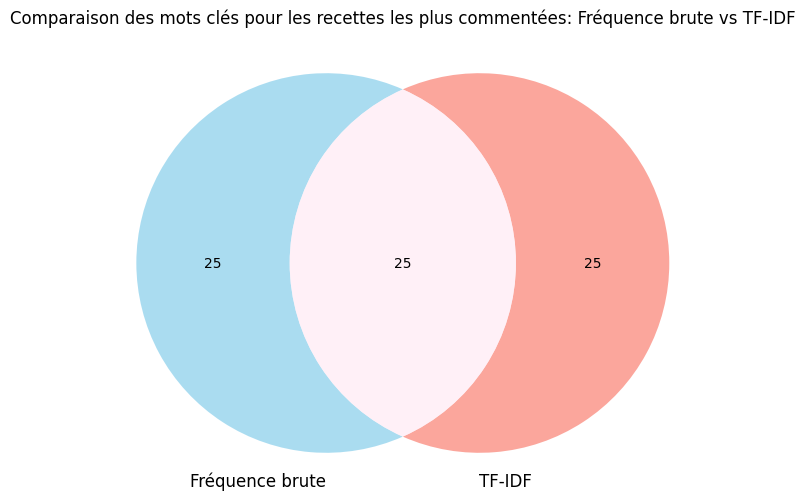

In [571]:
plt.figure(figsize=(8, 6))
venn2(
    [set(freq_words_top_review), set(tfidf_words_top_review)],
    ("Fréquence brute", "TF-IDF"),
    set_colors=("skyblue", "salmon"),
    alpha=0.7
)
plt.title("Comparaison des mots clés pour les recettes les plus commentées: Fréquence brute vs TF-IDF")
plt.show()

**3.a/ Analyse de mot dans les recettes les plus commentées et moins bien notées -- frequence brute**

In [560]:
# Tout en une chaîne pour les IDs et les textes
bad_rated_and_reviewed_recipe_ids = (
    df_interaction
    .group_by("recipe_id")
    .agg([
        pl.count().alias("total_review_count"),
        pl.col("rating").mean().alias("avg_rating")
    ])
    .sort("total_review_count", descending=True)
    .filter(pl.col("avg_rating") == 0.0)
    .head(50)["recipe_id"]
    .to_list()
)

texts_bad_rated_and_reviewed = (
    df_interaction
    .filter(
        (pl.col("recipe_id").is_in(bad_rated_and_reviewed_recipe_ids)) &
        (pl.col("rating") == 0.0)
    )
    ["review"]
    .to_list()
)

# Affichage des 10 premières recettes sélectionnées
print("Recettes sélectionnées (ID, nombre total de reviews, note moyenne) :")
print(
    df_interaction
    .group_by("recipe_id")
    .agg([
        pl.count().alias("total_review_count"),
        pl.col("rating").mean().alias("avg_rating")
    ])
    .sort("total_review_count", descending=True)
    .filter(pl.col("avg_rating") == 0.0)
    .head(10)
)

print(f"\nNombre de reviews notées 0/5 extraites : {len(texts_bad_rated_and_reviewed)}")


Recettes sélectionnées (ID, nombre total de reviews, note moyenne) :
shape: (10, 3)
┌───────────┬────────────────────┬────────────┐
│ recipe_id ┆ total_review_count ┆ avg_rating │
│ ---       ┆ ---                ┆ ---        │
│ i64       ┆ u32                ┆ f64        │
╞═══════════╪════════════════════╪════════════╡
│ 18260     ┆ 10                 ┆ 0.0        │
│ 187125    ┆ 5                  ┆ 0.0        │
│ 126622    ┆ 4                  ┆ 0.0        │
│ 220329    ┆ 4                  ┆ 0.0        │
│ 13447     ┆ 4                  ┆ 0.0        │
│ 474352    ┆ 4                  ┆ 0.0        │
│ 536747    ┆ 4                  ┆ 0.0        │
│ 335158    ┆ 4                  ┆ 0.0        │
│ 533190    ┆ 4                  ┆ 0.0        │
│ 535581    ┆ 4                  ┆ 0.0        │
└───────────┴────────────────────┴────────────┘

Nombre de reviews notées 0/5 extraites : 158


/tmp/ipykernel_172925/4127138916.py:6: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
(Deprecated in version 0.20.5)
  pl.count().alias("total_review_count"),
/tmp/ipykernel_172925/4127138916.py:31: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
(Deprecated in version 0.20.5)
  pl.count().alias("total_review_count"),


In [561]:
# Charger le modèle spaCy
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])

# Définir les stop words
stop_words = set(spacy.lang.en.stop_words.STOP_WORDS)
stop_words.update(['recipe','thank','think','instead','minute','hour','I','water','bit','definitely','thing','half','way','sure'])

def clean_text(text):
    if isinstance(text, str) and pd.notna(text):
        doc = nlp(text.lower())
        words = [token.lemma_ for token in doc if token.is_alpha and token.lemma_ not in stop_words and token.pos_ !="VERB"]
        return words
    return []

# Appliquer le nettoyage à tous les textes des reviews
cleaned_texts_bad_rated_and_reviewed = []
for text in texts_bad_rated_and_reviewed:
    cleaned_texts_bad_rated_and_reviewed.extend(clean_text(text))

In [562]:
# Compter les occurrences des mots nettoyés
word_counts_bad_rated_and_reviewed = Counter(cleaned_texts_bad_rated_and_reviewed)

# Afficher les 100 mots les plus fréquents
most_common_words_bad_rated_and_reviewed= word_counts_bad_rated_and_reviewed.most_common(100)

print("Mots les plus fréquents dans les 50 recettes les moins bien notés et plus commentées :")
print(most_common_words_bad_rated_and_reviewed)

Mots les plus fréquents dans les 50 recettes les moins bien notés et plus commentées :
[('good', 25), ('dog', 22), ('milk', 21), ('like', 20), ('ingredient', 20), ('meat', 17), ('egg', 17), ('bone', 17), ('raw', 16), ('butter', 15), ('chicken', 15), ('dish', 14), ('sauce', 14), ('soup', 12), ('cup', 12), ('time', 11), ('fresh', 11), ('people', 11), ('great', 11), ('sugar', 10), ('food', 10), ('beef', 10), ('cat', 10), ('beer', 10), ('paste', 9), ('potato', 9), ('animal', 9), ('pork', 8), ('different', 8), ('cream', 8), ('jug', 8), ('paella', 8), ('day', 7), ('cake', 7), ('direction', 7), ('problem', 7), ('oil', 7), ('away', 6), ('pan', 6), ('little', 6), ('bean', 6), ('curry', 6), ('favorite', 6), ('right', 6), ('easy', 6), ('fish', 6), ('mom', 6), ('chili', 6), ('low', 6), ('christmas', 6), ('consistency', 6), ('salt', 6), ('year', 6), ('flour', 6), ('cooking', 6), ('stock', 6), ('carrot', 6), ('oh', 5), ('similar', 5), ('wonderful', 5), ('exactly', 5), ('maybe', 5), ('heat', 5), ('pr

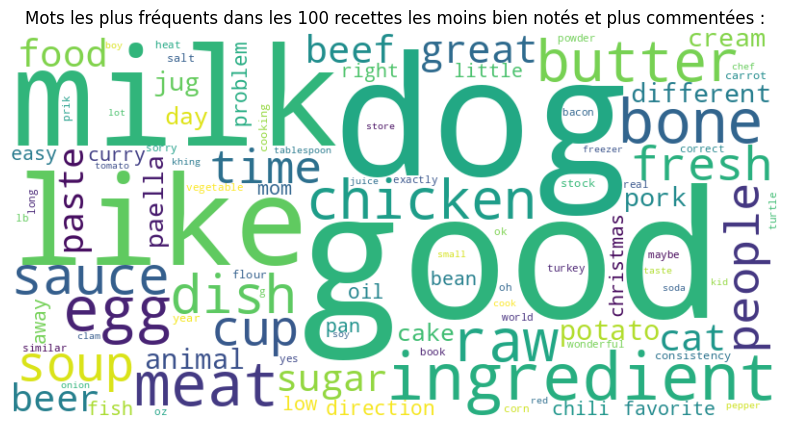

In [563]:

# Générer le nuage de mots
word_freqbrut_bad_review = dict(most_common_words_bad_rated_and_reviewed)
wordcloudbrut_bad_review = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freqbrut_bad_review)

# Afficher le nuage de mots
plt.figure(figsize=(10, 5))
plt.imshow(wordcloudbrut_bad_review , interpolation='bilinear')
plt.axis('off')
plt.title("Mots les plus fréquents dans les 100 recettes les moins bien notés et plus commentées :")
plt.show()

**3.b/ Analyse de mot dans les recettes les plus commentées et moins bien notées -- TF-IDF**

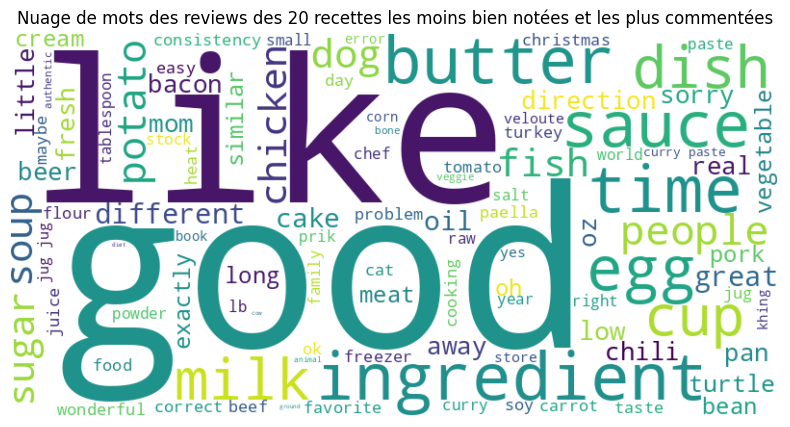

In [564]:
# Nettoyer chaque review et la reconstituer en chaîne de caractères
cleaned_bad_review = [" ".join(clean_text(text)) for text in texts_bad_rated_and_reviewed ]

# Initialiser le vectoriseur TF-IDF
vectorizer = TfidfVectorizer(
    max_features=100,  # Limiter au top 1000 mots
    stop_words='english',  # Optionnel : filtrer les stop words anglais
    ngram_range=(1, 2)  # Optionnel : inclure les bigrams (ex: "very good")
)

# Appliquer TF-IDF aux reviews nettoyées
tfidf_matrix_bad_review = vectorizer.fit_transform(cleaned_bad_review)

# Récupérer les noms des features (mots)
feature_names = vectorizer.get_feature_names_out()
# Calculer la somme des scores TF-IDF pour chaque mot
tfidf_scores_bad_review = tfidf_matrix_bad_review.sum(axis=0).A1

# Créer un DataFrame pour visualiser les résultats
tfidf_df_bad_review = pd.DataFrame({
    "word": feature_names,
    "tfidf_score": tfidf_scores_bad_review
}).sort_values("tfidf_score", ascending=False)
# Générer le nuage de mots
word_freq_idf_bad_review = dict(zip(tfidf_df_bad_review ["word"], tfidf_df_bad_review["tfidf_score"]))

wordcloud_idf_bad_review = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_idf_bad_review)

# Afficher le nuage de mots
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_idf_bad_review, interpolation='bilinear')
plt.axis('off')
plt.title("Nuage de mots des reviews des 20 recettes les moins bien notées et les plus commentées")
plt.show()

**3.c/ Comparatif des deux méthodes**

In [578]:
# Mots les plus fréquents

freq_word_bad_review = [word for word, _ in word_counts_bad_review.most_common(100)]

# Top mots TF-IDF
tfidf_word_bad_review = tfidf_df_bad_review["word"].head(100).tolist()

print("\nComparaison :")
print("Top 10 mots fréquents :", freq_word_bad_review [:20])
print("Top 10 mots TF-IDF :", tfidf_df_bad_review["word"].head(20).tolist())


Comparaison :
Top 10 mots fréquents : ['good', 'dog', 'milk', 'like', 'ingredient', 'meat', 'egg', 'bone', 'raw', 'butter', 'chicken', 'dish', 'sauce', 'soup', 'cup', 'time', 'fresh', 'people', 'great', 'sugar']
Top 10 mots TF-IDF : ['good', 'like', 'ingredient', 'butter', 'time', 'sauce', 'egg', 'dish', 'milk', 'cup', 'people', 'potato', 'soup', 'dog', 'fish', 'sugar', 'chicken', 'different', 'great', 'cake']


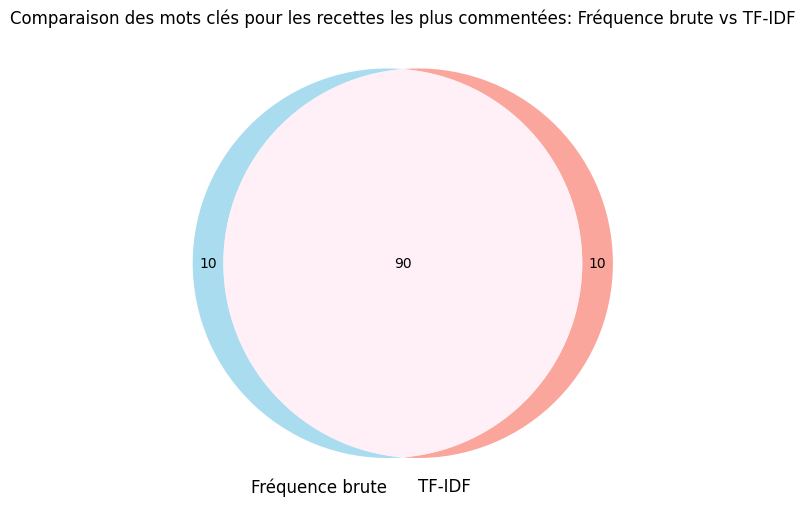

In [579]:
plt.figure(figsize=(8, 6))
venn2(
    [set(freq_word_bad_review), set(tfidf_word_bad_review)],
    ("Fréquence brute", "TF-IDF"),
    set_colors=("skyblue", "salmon"),
    alpha=0.7
)
plt.title("Comparaison des mots clés pour les recettes les plus commentées: Fréquence brute vs TF-IDF")
plt.show()

**IV/ Affichage des ingrédients les plus utilisés dans les recettes**

/tmp/ipykernel_172925/3002499031.py:30: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
(Deprecated in version 0.20.5)
  .agg(pl.count().alias("count"))


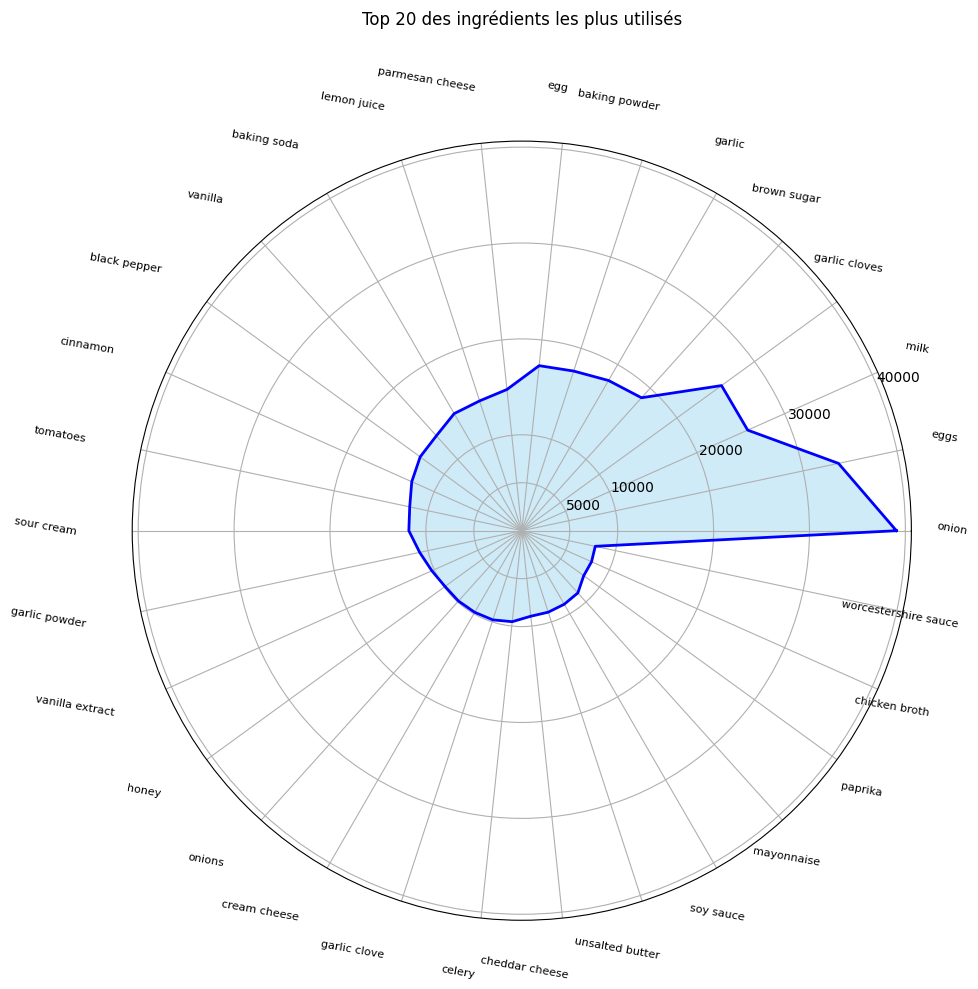

In [621]:

# Liste des ingrédients à exclure
excluded_ingredients = ["salt", "water", "oil", "sugar", "pepper", "butter", "flour", "salt and pepper","olive oil","vegetable oil","all-purpose flour"]

# Nettoyage et explosion
ingredients_cleaned = (
    df_recipe
    .with_columns(
        pl.col("ingredients")
        .str.replace_all(r"[\[\]\"]", "")
        .str.replace_all("'", "")
        .alias("cleaned_ingredients")
    )
    .select(
        pl.col("cleaned_ingredients")
        .str.split(", ")
        .explode()
        .alias("ingredient")
    )
    .filter(
        (pl.col("ingredient") != "") &
        (~pl.col("ingredient").is_in(excluded_ingredients))
    )
)

# Compter les occurrences
ingredient_counts = (
    ingredients_cleaned
    .group_by("ingredient")
    .agg(pl.count().alias("count"))
    .sort("count", descending=True)
    .head(30)
)

# Préparer les données pour le diagramme polaire
ingredients = ingredient_counts["ingredient"].to_list()
counts = ingredient_counts["count"].to_list()

# Fermer le cercle
angles = np.linspace(0, 2 * np.pi, len(ingredients), endpoint=False).tolist()
angles += angles[:1]
counts += counts[:1]

# Tracer le diagramme polaire
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': 'polar'})
ax.fill(angles, counts, color='skyblue', alpha=0.4)
ax.plot(angles, counts, color='blue', linewidth=2)
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(ingredients, rotation=45, ha='right')
ax.tick_params(axis='x', pad=30,labelsize=8,rotation=350)
ax.set_title('Top 20 des ingrédients les plus utilisés', pad=30)
plt.yticks([5000, 10000, 20000, 30000, 40000], ["5000", "10000", "20000", "30000", "40000"])
plt.tight_layout()
plt.show()

In [598]:
ingredient_counts.head(30)


ingredient,count
str,u32
"""onion""",39065
"""eggs""",33761
"""milk""",25786
"""garlic cloves""",25748
"""brown sugar""",18655
…,…
"""unsalted butter""",8935
"""soy sauce""",8856
"""mayonnaise""",8736
